### 祝驿楠的疑问
- 天线阻抗会随阅读器天线发送功率的改变而变化吗？比如调大发送功率后相位也会变化，这是因为多径变化造成的，还是天线阻抗也有变化呢？
- 固定reader和tag的位置和朝向都不变，频率也不变，然后只改变功率从23dbm到26dbm，发现相位确实有变化。我的理解是首先多径肯定有变化，因为信号强度改变后多径合成后的信号肯定也会变化。但不确定天线阻抗是否变化。因为我没找到一个开阔的没有多径的地方

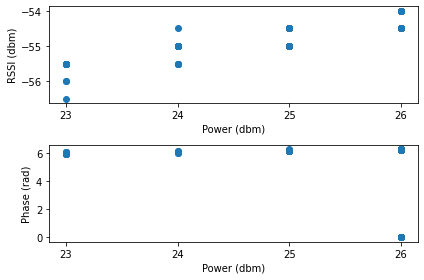

In [2]:
import glob, os
import matplotlib.pyplot as plt
import re
import pandas as pd


def import_data():
    folder = 'd:\\Atom\exp\\zhuyinan'
    pattern = "_\d{2}dbm"
    li = []
    for file in glob.glob(os.path.join(folder, "*.txt")):
        power_sub_str = re.search(pattern, file).group(0)
        power = ''.join([n for n in power_sub_str if n.isdigit()])
        df = pd.read_csv(file, header=None, usecols=[1, 2], names=['RSSI', 'PHASE'])
        df.insert(len(df.columns), 'POWER', power)
        li.append(df)
    return pd.concat(li)


if __name__ == '__main__':
    df = import_data()
    plt.subplot(211)
    plt.xlabel('Power (dbm)')
    plt.ylabel('RSSI (dbm)')
    plt.scatter(df['POWER'], df['RSSI'])

    plt.subplot(212)
    plt.xlabel('Power (dbm)')
    plt.ylabel('Phase (rad)')
    plt.scatter(df['POWER'], df['PHASE'])

    plt.tight_layout()
    plt.show()